In [1]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("../dataset/dataset.csv")

# Display the first few rows of the dataset
df.head()


,patent_id,title,assignee,author,priority_date,creation_date,publ_date,grant_date,result_link,fig_link
0,US-11074495-B2,System and method for extremely efficient imag...,"Z Advanced Computing, Inc. (Zac)","Lotfi A. Zadeh, Saied Tadayon, Bijan Tadayon",28-02-2013,12-03-2018,27-07-2021,27-07-2021,https://patents.google.com/patent/US11074495B2/en,https://patentimages.storage.googleapis.com/32...
1,AU-2021204774-B2,Security in a smart-sensored home,Google Llc,"Anthony M. Fadell, Yoky Matsuoka, Matthew Lee ...",14-03-2013,08-07-2021,10-11-2022,10-11-2022,https://patents.google.com/patent/AU2021204774...,NaN
2,US-11526167-B1,Autonomous vehicle component maintenance and r...,State Farm Mutual Automobile Insurance Company,"Blake Konrardy, Scott T. Christensen, Gregory ...",22-01-2016,20-10-2020,13-12-2022,13-12-2022,https://patents.google.com/patent/US11526167B1/en,https://patentimages.storage.googleapis.com/7b...
3,US-11238538-B1,Accident risk model determination using autono...,State Farm Mutual Automobile Insurance Company,"Blake Konrardy, Scott T. Christensen, Gregory ...",20-05-2014,07-11-2019,01-02-2022,01-02-2022,https://patents.google.com/patent/US11238538B1/en,https://patentimages.storage.googleapis.com/13...
4,CN-110782870-B,"Speech synthesis method, device, electronic eq...",腾讯科技（深圳）有限公司,"杨兵, 陈凌辉, 钟佳琪",06-09-2019,06-09-2019,16-06-2023,16-06-2023,https://patents.google.com/patent/CN110782870B/en,https://patentimages.storage.googleapis.com/07...


In [2]:
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Drop rows where critical fields are missing
df.dropna(subset=['patent_id', 'title', 'assignee'], inplace=True)

# Convert date columns to datetime format
date_columns = ['priority_date', 'creation_date', 'publ_date', 'grant_date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Remove duplicates based on 'patent_id'
df.drop_duplicates(subset='patent_id', inplace=True)

# Display cleaned data overview
df.info()


Missing values per column:
 patent_id           0
title               0
assignee            3
author             11
priority_date       3
creation_date       2
publ_date           0
grant_date       3783
result_link         0
fig_link         2745
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 21692 entries, 0 to 21694
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   patent_id      21692 non-null  object        
 1   title          21692 non-null  object        
 2   assignee       21692 non-null  object        
 3   author         21684 non-null  object        
 4   priority_date  21692 non-null  datetime64[ns]
 5   creation_date  7543 non-null   datetime64[ns]
 6   publ_date      21692 non-null  datetime64[ns]
 7   grant_date     17912 non-null  datetime64[ns]
 8   result_link    21692 non-null  object        
 9   fig_link       18950 non-null  object        
dtypes: datetime64[ns](

C:\Users\ishtv\AppData\Local\Temp\ipykernel_38396\1088736486.py:10: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce')
C:\Users\ishtv\AppData\Local\Temp\ipykernel_38396\1088736486.py:10: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce')
C:\Users\ishtv\AppData\Local\Temp\ipykernel_38396\1088736486.py:10: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce')


In [3]:
df.shape

(21692, 10)

In [4]:
# Example of data type validation
assert df['patent_id'].dtype == 'object', "patent_id should be a string"
assert df['assignee'].dtype == 'object', "assignee should be a string"

# Check for invalid or unexpected values in numerical and categorical fields
print("Unique values in assignee column:\n", df['assignee'].unique())


Unique values in assignee column:
 ['Z Advanced Computing, Inc. (Zac)' 'Google Llc'
 'State Farm Mutual Automobile Insurance Company' ...
 'Konink Ptt Nederland Nv, Bell Communications Res' '엘단 엘리, 코그니텐즈 리미티드'
 '独立行政法人科学技術振興機構']


In [5]:
# Extract country code and add as new column after 'patent_id'
df.insert(1, 'country_code', df['patent_id'].str.split('-').str[0])

# Display the updated DataFrame
print(df)
df.head()

                patent_id country_code  \
0          US-11074495-B2           US   
1        AU-2021204774-B2           AU   
2          US-11526167-B1           US   
3          US-11238538-B1           US   
4          CN-110782870-B           CN   
...                   ...          ...   
21690       ES-2304394-T3           ES   
21691      CN-100356369-C           CN   
21692    KR-19990008059-A           KR   
21693     JP-2002529820-A           JP   
21694  JP-WO2005046942-A1           JP   

                                                   title  \
0      System and method for extremely efficient imag...   
1                     Security in a smart-sensored home    
2      Autonomous vehicle component maintenance and r...   
3      Accident risk model determination using autono...   
4      Speech synthesis method, device, electronic eq...   
...                                                  ...   
21690  Dispositivo para la prediccion de eventos hipo...   
21691          

,patent_id,country_code,title,assignee,author,priority_date,creation_date,publ_date,grant_date,result_link,fig_link
0,US-11074495-B2,US,System and method for extremely efficient imag...,"Z Advanced Computing, Inc. (Zac)","Lotfi A. Zadeh, Saied Tadayon, Bijan Tadayon",2013-02-28,2018-12-03,2021-07-27,2021-07-27,https://patents.google.com/patent/US11074495B2/en,https://patentimages.storage.googleapis.com/32...
1,AU-2021204774-B2,AU,Security in a smart-sensored home,Google Llc,"Anthony M. Fadell, Yoky Matsuoka, Matthew Lee ...",2013-03-14,2021-08-07,2022-11-10,2022-11-10,https://patents.google.com/patent/AU2021204774...,NaN
2,US-11526167-B1,US,Autonomous vehicle component maintenance and r...,State Farm Mutual Automobile Insurance Company,"Blake Konrardy, Scott T. Christensen, Gregory ...",2016-01-22,NaT,2022-12-13,2022-12-13,https://patents.google.com/patent/US11526167B1/en,https://patentimages.storage.googleapis.com/7b...
3,US-11238538-B1,US,Accident risk model determination using autono...,State Farm Mutual Automobile Insurance Company,"Blake Konrardy, Scott T. Christensen, Gregory ...",2014-05-20,2019-07-11,2022-02-01,2022-02-01,https://patents.google.com/patent/US11238538B1/en,https://patentimages.storage.googleapis.com/13...
4,CN-110782870-B,CN,"Speech synthesis method, device, electronic eq...",腾讯科技（深圳）有限公司,"杨兵, 陈凌辉, 钟佳琪",2019-09-06,2019-06-09,2023-06-16,2023-06-16,https://patents.google.com/patent/CN110782870B/en,https://patentimages.storage.googleapis.com/07...


In [19]:
# Filter to check if country_code contains exactly 2 uppercase letters
non_compliant_codes = df[~df['country_code'].str.match(r'^[A-Z]{2}$')]

# Display records that don't follow the two-letter country code convention
print("Non-compliant Country Codes:")
print(non_compliant_codes[['patent_id', 'country_code']])

Non-compliant Country Codes:
Empty DataFrame
Columns: [patent_id, country_code]
Index: []


In [6]:
# Generate summary statistics for numerical columns
numerical_summary = df.describe()
print("Numerical Summary Statistics:\n", numerical_summary)

for col in date_columns:
    print(f"{col} - Min Date:", df[col].min(), "| Max Date:", df[col].max())


Numerical Summary Statistics:
                        priority_date                  creation_date  \
count                          21692                           7543   
mean   2017-08-29 11:03:34.420062720  2019-05-13 07:24:37.131115008   
min              1985-11-27 00:00:00            1987-04-11 00:00:00   
25%              2016-12-20 00:00:00            2018-06-02 00:00:00   
50%              2018-06-04 00:00:00            2019-08-11 00:00:00   
75%              2019-08-06 00:00:00            2020-11-01 12:00:00   
max              2024-03-29 00:00:00            2024-12-06 00:00:00   

                           publ_date                     grant_date  
count                          21692                          17912  
mean   2021-08-28 09:40:23.676931840  2021-11-20 20:37:48.691379968  
min              1989-02-07 00:00:00            1989-02-07 00:00:00  
25%              2020-10-06 00:00:00            2020-11-10 00:00:00  
50%              2022-01-18 00:00:00            20

In [18]:
# Frequency counts for categorical columns
assignee_counts = df['assignee'].value_counts()
author_counts = df['author'].value_counts()
country_code_counts = df['country_code'].value_counts()

print("Top 10 Assignees:\n", assignee_counts.head(10))
print("\n\nTop 10 Authors:\n", author_counts.head(10))
print("\n\nTop 10 Countries:\n", country_code_counts.head(10))


Top 10 Assignees:
 assignee
腾讯科技（深圳）有限公司                                   642
Samsung Electronics Co., Ltd.                  594
At&T Intellectual Property I, L.P.             417
International Business Machines Corporation    392
Intel Corporation                              391
平安科技（深圳）有限公司                                   293
Lg Electronics Inc.                            271
엘지전자 주식회사                                      186
Amazon Technologies, Inc.                      185
Microsoft Technology Licensing, Llc            180
Name: count, dtype: int64


Top 10 Authors:
 author
Steven Mason, Daniel Posnack, Peter Arn, Wendy Para, S. Adam Hacking, Micheal Mueller, Joseph GUANERI, Jonathan Greene    22
不公告发明人                                                                                                                    22
Tony M. Brewer                                                                                                            22
Yasushi Shigeta                    

In [8]:
import matplotlib.pyplot as plt


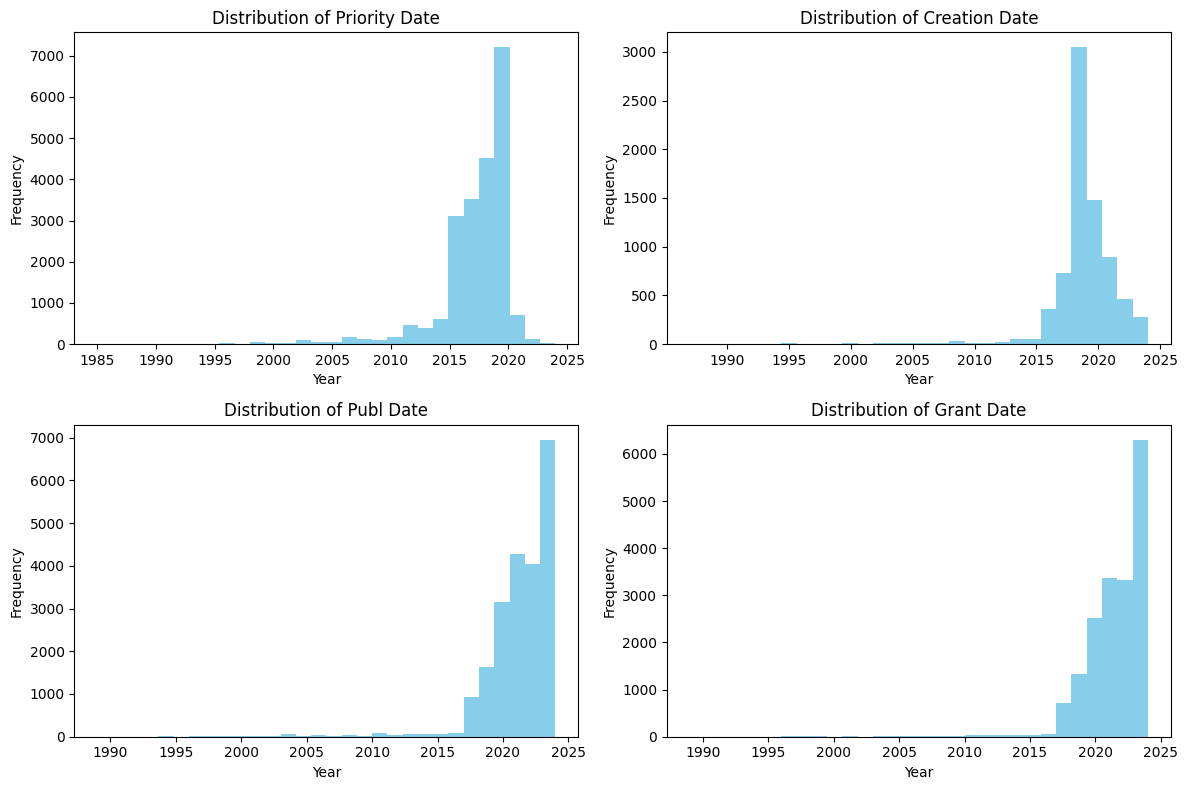

In [9]:
# Histogram for each date column
date_columns = ['priority_date', 'creation_date', 'publ_date', 'grant_date']

plt.figure(figsize=(12, 8))
for i, col in enumerate(date_columns, start=1):
    plt.subplot(2, 2, i)
    df[col].dropna().apply(lambda x: x.year).plot(kind='hist', bins=30, color='skyblue')
    plt.title(f'Distribution of {col.replace("_", " ").title()}')
    plt.xlabel('Year')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


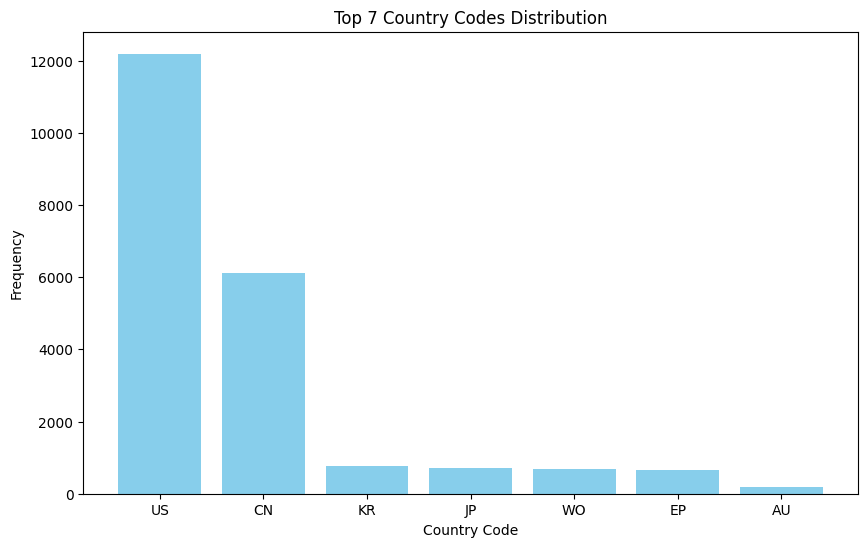

In [20]:
# Get the top 7 most common country codes
top_countries = df['country_code'].value_counts().head(7)

# Plotting the frequency count distribution of the top 7 countries
plt.figure(figsize=(10, 6))
plt.bar(top_countries.index, top_countries.values, color='skyblue')
plt.xlabel('Country Code')
plt.ylabel('Frequency')
plt.title('Top 7 Country Codes Distribution')
plt.show()

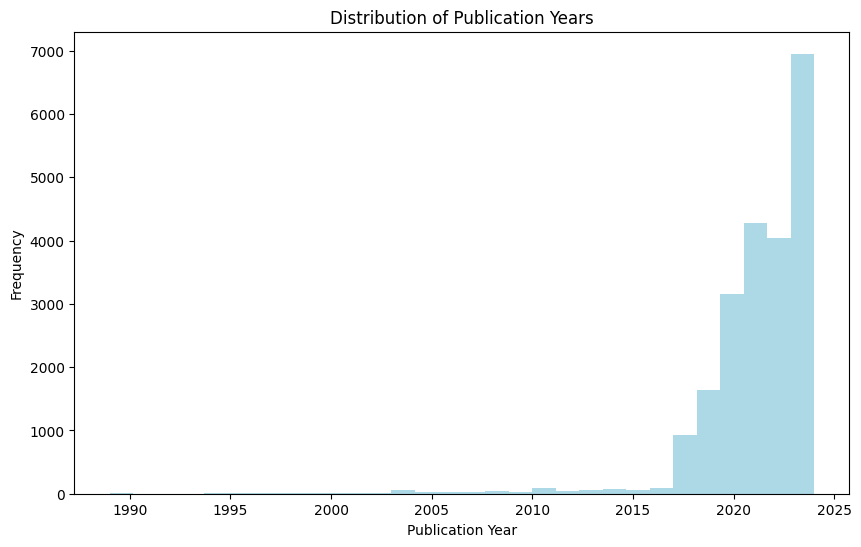

In [11]:
plt.figure(figsize=(10, 6))
df['publ_date'].dropna().apply(lambda x: x.year).plot(kind='hist', bins=30, color='lightblue')
plt.title('Distribution of Publication Years')
plt.xlabel('Publication Year')
plt.ylabel('Frequency')
plt.show()


In [22]:
%pip install pandas sqlalchemy psycopg2


Note: you may need to restart the kernel to use updated packages.


In [25]:
from sqlalchemy import create_engine

username = 'postgres'
password = 'sukhreen'
host = 'localhost'
port = '5432'
database = 'patent_data'

# Create an SQLAlchemy engine
engine = create_engine(f'postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}')


In [26]:
# Upload the DataFrame to PostgreSQL
df.to_sql('patent_data', con=engine, if_exists='replace', index=False)


692